Looking for some examples on how to use docTR for OCR-related tasks? You've come to the right place 😀

# Installation

Install all the dependencies to make the most out of docTR. The project provides two main [installation](https://mindee.github.io/doctr/latest/installing.html) streams: one for stable release, and developer mode.

## Latest stable release

This will install the last stable release that was published by our teams on pypi. It is expected to provide a clean and non-buggy experience for all users.

In [1]:
# TensorFlow
# !pip install python-doctr[tf]
# PyTorch
!pip install python-doctr[torch]
# Restart runtime
exit()

zsh:1: no matches found: python-doctr[torch]


## From source

Before being staged for a stable release, we constantly iterate on the community feedback to improve the library. Bug fixes and performance improvements are regularly pushed to the project Git repository. Using this installation method, you will access all the latest features that have not yet made their way to a pypi release!

In [1]:
# Colab related installations to install pyproject.toml projects correctly
!sudo apt install libcairo2-dev pkg-config
!pip3 install pycairo
# Install the most up-to-date version from GitHub
# TensorFlow
# !pip install python-doctr[tf]@git+https://github.com/mindee/doctr.git
# PyTorch
!pip3 install python-doctr[torch]@git+https://github.com/mindee/doctr.git
# Restart runtime
exit()

[sudo] password for skit: 
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.9/346.9 kB 4.6 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... -^C
anceled
ERROR: Operation cancelled by user
zsh:1: no matches found: python-doctr[torch]@git+https://github.com/mindee/doctr.git


Now go to  `Runtime/Restart runtime` for your changes to take effect!

# Basic usage

We're going to review the main features of docTR 🎁
And for you to have a proper overview of its capabilities, we will need some free fonts for a proper output visualization:

In [ ]:
# Install some free fonts for result rendering
!sudo apt-get install fonts-freefont-ttf -y

Let's take care of all the imports directly

In [1]:
%matplotlib inline
import os

# Let's pick the desired backend
# os.environ['USE_TF'] = '1'
os.environ['USE_TORCH'] = '1'

import matplotlib.pyplot as plt

from doctr.io import DocumentFile
from doctr.models import ocr_predictor

For the next steps, we will need a proper PDF document that will be used to showcase the library features

In [2]:
# Download a sample
!wget https://eforms.com/download/2019/01/Cash-Payment-Receipt-Template.pdf
# Read the file
doc = DocumentFile.from_pdf("Cash-Payment-Receipt-Template.pdf")
print(f"Number of pages: {len(doc)}")

--2024-03-16 09:34:56--  https://eforms.com/download/2019/01/Cash-Payment-Receipt-Template.pdf
Resolving eforms.com (eforms.com)... 2606:4700:20::681a:118, 2606:4700:20::ac43:49bc, 2606:4700:20::681a:18, ...
Connecting to eforms.com (eforms.com)|2606:4700:20::681a:118|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16080 (16K) [application/pdf]
Saving to: ‘Cash-Payment-Receipt-Template.pdf’

Cash-Payment-Receip 100%[===================>]  15.70K  --.-KB/s    in 0s      

2024-03-16 09:34:57 (153 MB/s) - ‘Cash-Payment-Receipt-Template.pdf’ saved [16080/16080]

Number of pages: 1


docTR is, under the hood, running Deep Learning models to perform the different tasks it supports. Those models were built and trained with very popular frameworks for maximum compatibility (you will be pleased to know that you can switch from [PyTorch](https://pytorch.org/) to [TensorFlow](https://www.tensorflow.org/) without noticing any difference for you). By default, our high-level API sets the best default values so that you get high performing models without having to know anything about it. All of this is wrapper in a `Predictor` object, which will take care of pre-processing, model inference and post-processing for you ⚡

Let's instantiate one!

In [3]:
# Instantiate a pretrained model
predictor = ocr_predictor(pretrained=True)

  0%|          | 0/102021912 [00:00<?, ?it/s]

  0%|          | 0/63286381 [00:00<?, ?it/s]

By default, PyTorch model provides a nice visual description of a model, which is handy when it comes to debugging or knowing what you just created. We also added a similar feature for TensorFlow backend so that you don't miss on this nice assistance.

Let's dive into this model 🕵

In [4]:
# Display the architecture
print(predictor)

OCRPredictor(
  (det_predictor): DetectionPredictor(
    (pre_processor): PreProcessor(
      (resize): Resize(output_size=(1024, 1024), interpolation='bilinear', preserve_aspect_ratio=True, symmetric_pad=True)
      (normalize): Normalize(mean=(0.798, 0.785, 0.772), std=(0.264, 0.2749, 0.287))
    )
    (model): DBNet(
      (feat_extractor): IntermediateLayerGetter(
        (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
        (layer1): Sequential(
          (0): Bottleneck(
            (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), p

Here we are inspecting the most complex (and high-level) object of docTR API: an OCR predictor. Since docTR achieves Optical Character Recognition by first localizing textual elements (Text Detection), then extracting the corresponding text from each location (Text Recognition), the OCR Predictor wraps two sub-predictors: one for text detection, and the other for text recognition.

## Basic inference

It looks quite complex, isn't it?
Well that will not prevent you from easily get nice results. See for yourself:

In [5]:
result = predictor(doc)

## Prediction visualization

If you rightfully prefer to see the results with your eyes, docTR includes a few visualization features. We will first overlay our predictions on the original document:

In [6]:
result.show(doc)

TypeError: Document.show() takes 1 positional argument but 2 were given

Looks accurate!
But we can go further: if the extracted information is correctly structured, we should be able to recreate the page entirely. So let's do this 🎨

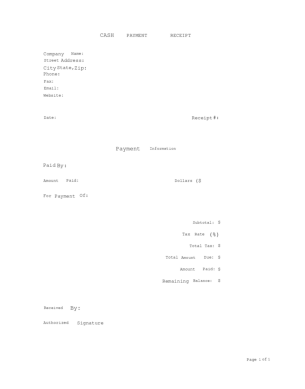

In [7]:
synthetic_pages = result.synthesize()
plt.imshow(synthetic_pages[0]); plt.axis('off'); plt.show()

## Exporting results

OK, so the predictions are relevant, but how would you integrate this into your own document processing pipeline? Perhaps you're not using Python at all?

Well, if you happen to be using JSON or XML exports, they are already supported 🤗

In [8]:
# JSON export
json_export = result.export()
print(json_export)


{'pages': [{'page_idx': 0, 'dimensions': (1584, 1224), 'orientation': {'value': None, 'confidence': None}, 'language': {'value': None, 'confidence': None}, 'blocks': [{'geometry': ((0.3142233455882353, 0.0625), (0.6857766544117647, 0.083984375)), 'lines': [{'geometry': ((0.3142233455882353, 0.0625), (0.6857766544117647, 0.083984375)), 'words': [{'value': 'CASH', 'confidence': 0.9986966252326965, 'geometry': ((0.3142233455882353, 0.0625), (0.39763327205882354, 0.083984375))}, {'value': 'PAYMENT', 'confidence': 0.9999579191207886, 'geometry': ((0.40774356617647056, 0.064453125), (0.5492876838235294, 0.08203125))}, {'value': 'RECEIPT', 'confidence': 0.9815574884414673, 'geometry': ((0.5606617647058824, 0.064453125), (0.6857766544117647, 0.08203125))}]}], 'artefacts': []}, {'geometry': ((0.11707261029411764, 0.1142578125), (0.2775735294117647, 0.302734375)), 'lines': [{'geometry': ((0.11707261029411764, 0.1142578125), (0.2775735294117647, 0.1328125)), 'words': [{'value': 'Company', 'confid

In [ ]:
# XML export
xml_output = result.export_as_xml()
print(xml_output[0][0])